In [55]:
import os
import shutil
import json
import numpy as np
import pandas as pd

In [56]:
PATH="/run/media/archer/69DDEFE924458F06/spotgarbage-GINI/spotgarbage/garbage-queried-images/"

In [60]:
DATASET_DIR="/home/archer/machine_learning/garbage_dataset/"

In [58]:
dfdct=[]
for folder in os.listdir(PATH):
    for jn in os.listdir(PATH+folder):
        if jn[-5:]==".json":
            with open(PATH+folder+"/"+jn,"r") as f:
                jj=f.read()
            jj=json.loads(jj)
            for ann in jj['annotations']:
                if ann['bbox'][0]<0 or ann['bbox'][1]<0:
                    continue
                dct={}
                dct['filename']=jj['images'][ann['image_id']-1]['file_name']
                shutil.copyfile(PATH+folder+"/"+dct['filename'],DATASET_DIR+"dataset/"+dct['filename'])
                dct['width']=jj['images'][ann['image_id']-1]['width']
                dct['height']=jj['images'][ann['image_id']-1]['height']
                dct['class']='garbage'
                dct['xmin']=ann['bbox'][0]
                dct['ymin']=ann['bbox'][1]
                dct['xmax']=ann['bbox'][0]+ann['bbox'][2]
                dct['ymax']=ann['bbox'][1]+ann['bbox'][3]
                dfdct.append(dct)
            break

In [51]:
clmns=['filename','width','height','class','xmin','ymin','xmax','ymax']
df=pd.DataFrame(dfdct,columns=clmns)

In [63]:
df.iloc[:-20].to_csv(DATASET_DIR+"train_labels.csv",index=False)

In [64]:
df.iloc[-20:].to_csv(DATASET_DIR+"test_labels.csv",index=False)

In [41]:
for ann in jj['annotations']:
    if ann['bbox'][0]<0 or ann['bbox'][1]<0:
        continue
    dct={}
    dct['filename']=jj['images'][ann['image_id']-1]['file_name']
    dct['width']=jj['images'][ann['image_id']-1]['width']
    dct['height']=jj['images'][ann['image_id']-1]['height']
    dct['class']='garbage'
    dct['xmin']=ann['bbox'][0]
    dct['ymin']=ann['bbox'][1]
    dct['xmax']=ann['bbox'][0]+ann['bbox'][2]
    dct['ymax']=ann['bbox'][1]+ann['bbox'][3]
    dfdct.append(dct)

In [49]:
dfdct

[{'filename': '398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 537,
  'height': 431,
  'class': 'garbage',
  'xmin': 92,
  'ymin': 310,
  'xmax': 177,
  'ymax': 389},
 {'filename': '398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 537,
  'height': 431,
  'class': 'garbage',
  'xmin': 327,
  'ymin': 398,
  'xmax': 414,
  'ymax': 430},
 {'filename': '398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 537,
  'height': 431,
  'class': 'garbage',
  'xmin': 165,
  'ymin': 130,
  'xmax': 200,
  'ymax': 165},
 {'filename': '398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 537,
  'height': 431,
  'class': 'garbage',
  'xmin': 314,
  'ymin': 271,
  'xmax': 383,
  'ymax': 329},
 {'filename': '495f1dca-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 468,
  'height': 648,
  'class': 'garbage',
  'xmin': 75,
  'ymin': 474,
  'xmax': 358,
  'ymax': 528},
 {'filename': '47e1b9a8-6799-11e5-8dc4-40f2e96c8ad8.jpg',
  'width': 537,
  'height': 359,
  'class': 'garbage',
  'xmin': 18,
  'ym

In [50]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.patches as patches

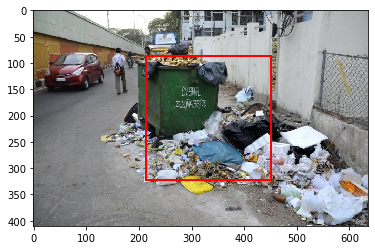

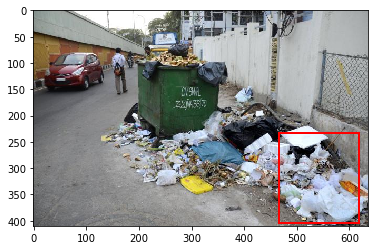

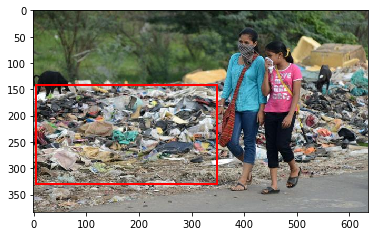

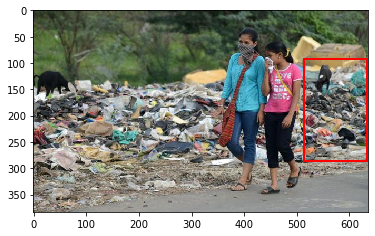

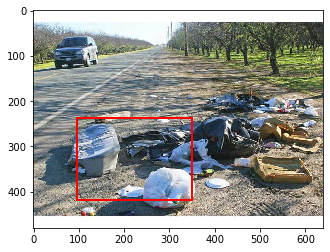

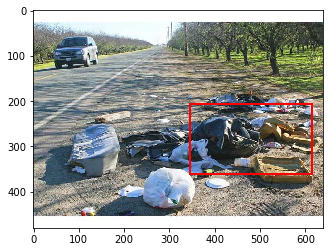

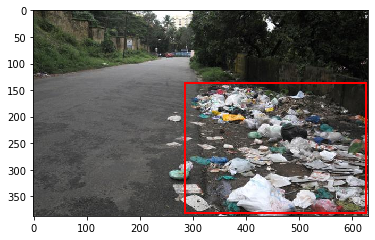

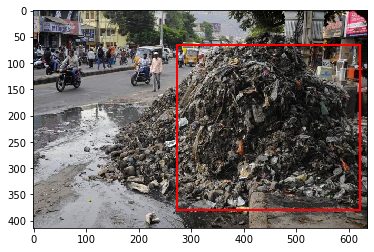

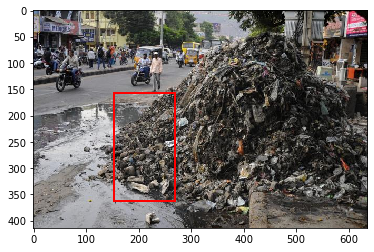

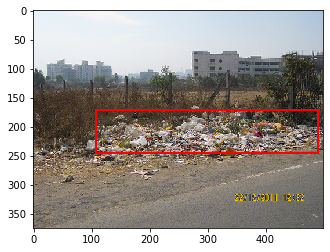

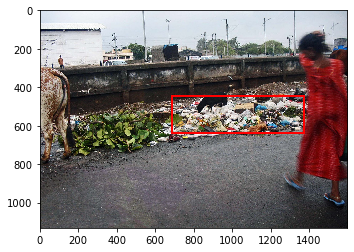

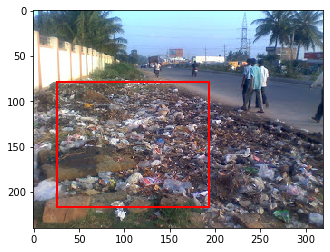

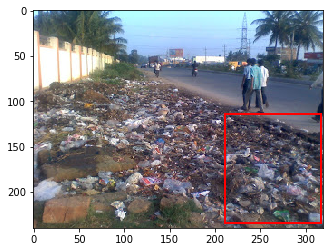

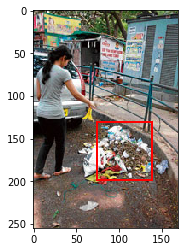

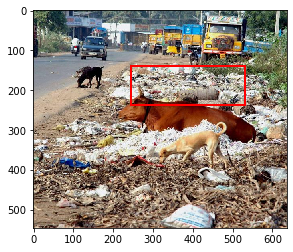

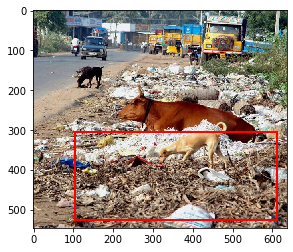

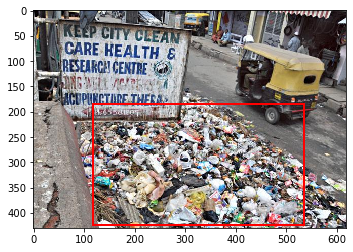

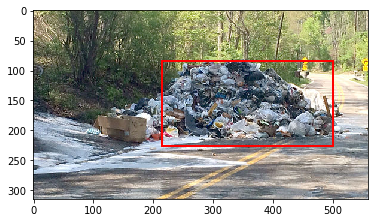

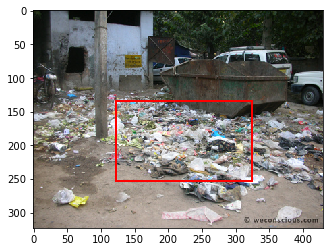

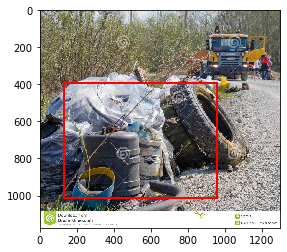

In [66]:
for i in dfdct[-20:]:
    img=imread(PATH+folder+"/"+i['filename'])
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    rect = patches.Rectangle((i['xmin'],i['ymin']),i['xmax']-i['xmin'],i['ymax']-i['ymin'],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()